In [ ]:
#prac 1 - bitwise binary numbers
def bitwise_ops(a,b):
    res = a & b
    print(f"and operation: between {a} and  {b} is: {res}")

    res = a | b
    print(f"or operation:between {a} or {b} is: {res}")

if __name__ == "__main__":
    a = int(input("enter a number: "))
    b = int(input("enter another number: "))
    bitwise_ops(a,b)

and operation: between 1 and  10 is: 0
or operation:between 1 or 10 is: 11


In [47]:
#prac 1 - bitwise text
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Corpus of text data
corpus = [ 
    "this is the first text", 
    "this is the second text", 
    "another text example"
]

# Vectorizing the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("DataFrame with vectorized text:\n", df)

# Bitwise AND operation (this & text)
print("\n--- Bitwise AND (this & text) ---")
and_res = df[(df['this'] == 1) & (df['text'] == 1)]
print(f"Documents matching 'this AND text': {and_res.index.tolist()}")

# Bitwise OR operation (this | text)
print("\n--- Bitwise OR (this | text) ---")
or_res = df[(df['this'] == 1) | (df['text'] == 1)]
print(f"Documents matching 'this OR text': {or_res.index.tolist()}")

# Bitwise NOT operation (~this)
print("\n--- Bitwise NOT (~this) ---")
not_res = df[~df['this'].astype(bool)]
print(f"Documents NOT containing 'this': {not_res.index.tolist()}")

# Bitwise XOR operation (this ^ text)
print("\n--- Bitwise XOR (this ^ text) ---")
xor_res = df[(df['this'] == 1) ^ (df['text'] == 1)]
print(f"Documents matching 'this XOR text': {xor_res.index.tolist()}")


DataFrame with vectorized text:
    another  example  first  is  second  text  the  this
0        0        0      1   1       0     1    1     1
1        0        0      0   1       1     1    1     1
2        1        1      0   0       0     1    0     0

--- Bitwise AND (this & text) ---
Documents matching 'this AND text': [0, 1]

--- Bitwise OR (this | text) ---
Documents matching 'this OR text': [0, 1, 2]

--- Bitwise NOT (~this) ---
Documents NOT containing 'this': [2]

--- Bitwise XOR (this ^ text) ---
Documents matching 'this XOR text': [2]


In [ ]:
#prac 2 page rank method 1
def page_rank(graph, damping_factor=0.85, max_iterations=100, tolerance=1e-6): 
    num_pages = len(graph) 
    initial_page_rank = 1.0 / num_pages 
 
    page_ranks = {page: initial_page_rank for page in graph} 
 
    for _ in range(max_iterations): 
        new_page_ranks = {} 
        for page in graph: 
            new_rank = (1 - damping_factor) / num_pages 
             
            for link in graph: 
                if page in graph[link]: 
                    new_rank += damping_factor * (page_ranks[link] / len(graph[link])) 
 
            new_page_ranks[page] = new_rank 
 
        # Check for convergence
        convergence = all(abs(new_page_ranks[page] - page_ranks[page]) < tolerance for page in graph)
        page_ranks = new_page_ranks
        
        if convergence: 
            break   

    return page_ranks 

if __name__ == "__main__":
    example_graph = { 
        'A': ['B', 'C'], 
        'B': ['A', 'D', 'E'], 
        'C': ['A', 'F'], 
        'D': ['B'], 
        'E': ['B', 'F'], 
        'F': ['C', 'E'] 
    }    

    result = page_rank(example_graph) 

    # Print page rank results 
    for page, rank in sorted(result.items(), key=lambda x: x[1], reverse=True): 
        print(f"Page: {page} - Page Rank: {rank:.6f}")


Page: B - Page Rank: 0.245404
Page: C - Page Rank: 0.165264
Page: F - Page Rank: 0.165264
Page: A - Page Rank: 0.164769
Page: E - Page Rank: 0.164769
Page: D - Page Rank: 0.094532


Page Rank:  {'A': 0.387789442707259, 'B': 0.21481051315058508, 'C': 0.3974000441421556}


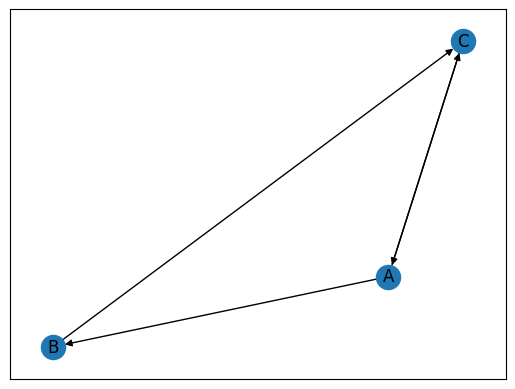

In [48]:
# prac 2b - PRA USING WEIGHTED EDGES

import networkx as nx 
import matplotlib.pyplot as plt 
G = nx.DiGraph() 
G.add_weighted_edges_from([('A','B',1),('A','C',1), ('C','A',1), ('B','C',1)]) 
ppr1 = nx.pagerank(G) 
print("Page Rank: ", ppr1) 
nx.draw_networkx(G,with_labels=True) 
plt.show()



Page Rank:  {'A': 0.4080745143467559, 'B': 0.07967426232810562, 'C': 0.13704946318948705, 'D': 0.13704946318948705, 'E': 0.021428571428571432, 'F': 0.07967426232810562, 'G': 0.13704946318948705}


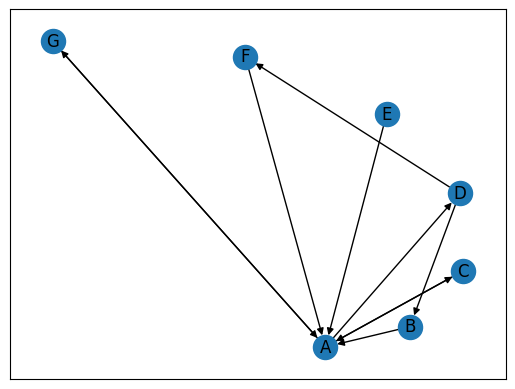

In [ ]:
#PRAC 2c -  No Weighted Edges, Spiral Graph

import networkx as nx 
import matplotlib.pyplot as plt 
G = nx.DiGraph() 
[G.add_node(k) for k in ["A","B","C","D","E","F","G"]]  
G.add_edges_from([('G','A'),('A','G'),('B','A'),('C','A'),('A','C'),('A','D'),('D','B'),('D','F'),('F','A'),('E','A')]) 
ppr1 = nx.pagerank(G) 
print("Page Rank: ",ppr1) 
spr = nx.spiral_layout(G) 
nx.draw_networkx(G, spr, with_labels=True ) 
plt.show()



In [ ]:
# pract 3 Query Based
from collections import defaultdict
import re

# Sample documents
documents = {
    1: "The quick brown fox jumps over the lazy dog",
    2: "A brown fox is fast and the dog is lazy",
    3: "London Bridge is falling down"
}

# Function to tokenize and preprocess the document
def preprocess(text):
    text = text.lower()
    tokens = re.findall(r'\w+', text)
    return set(tokens)  # Use a set to remove duplicate tokens

# Initialize the inverted index
inverted_index = defaultdict(set)

# Create the inverted index
for doc_id, doc_text in documents.items():
    terms = preprocess(doc_text)
    for term in terms:
        inverted_index[term].add(doc_id)

# Query function
def query(query_text):
    terms = preprocess(query_text)
    results = set()
    
    for term in terms:
        results.update(inverted_index.get(term, set()))  # Use set() instead of []
    
    return results

# Example query
query_result = query("brown fox")
print("Documents containing 'brown' and 'fox':", query_result)




Documents containing 'brown' and 'fox': {1, 2}


In [ ]:
#Pract 3b - Complete Document
from collections import defaultdict
def create_inverted_index(docs): 
    inverted_index = defaultdict(list) 
 
    for doc_id, text in enumerate(docs): 
        words = text.split() 
        for word in set(words): 
            inverted_index[word].append(doc_id) 
    return inverted_index 
 
docs= ['this is a sample document', 'this document is about python','this is original document'] 
index = create_inverted_index(docs) 
print(dict(index))


{'a': [0], 'sample': [0], 'this': [0, 1, 2], 'document': [0, 1, 2], 'is': [0, 1, 2], 'about': [1], 'python': [1], 'original': [2]}


In [ ]:
#prac 4 - Levenstein distance
def leven(x, y): 
    n = len(x) 
    m = len(y) 

    # Initialize the matrix with base cases
    a = [[i + j for j in range(m + 1)] for i in range(n + 1)] 

    # Compute Levenshtein distance
    for i in range(n): 
        for j in range(m): 
            a[i + 1][j + 1] = min( 
                a[i][j + 1] + 1,  # Deletion
                a[i + 1][j] + 1,  # Insertion
                a[i][j] + int(x[i] != y[j])  # Substitution
            ) 
    return a[n][m] 

# Test cases
print(leven("hi", "bye")) 
print(leven("nach", "dance")) 
print(leven("brap", "rap")) 
print(leven("trial", "try")) 



3
3
1
3


In [22]:
#HITS ALGO PRAC 5
import networkx as nx 
 
graph = nx.DiGraph() 
graph.add_edges_from([(1,2), (1,3), (2,4), (3,4), (4,5)]) 
 
# calculate HITS scores 
authority_scores, hub_scores = nx.hits(graph) 
 
print('Authority scores', authority_scores) 
print('Hub scores', hub_scores) 



Authority scores {1: -9.132475333025063, 2: 5.066237666512531, 3: 5.066237666512531, 4: 1.8224954914238178e-15, 5: 0.0}
Hub scores {1: 1.3446057320502662e-15, 2: 1.1229637913488781, 3: 1.1229637913488784, 4: -1.2459275826977572, 5: -4.482019106834222e-16}


In [ ]:
#prac 6- Similarities and distances
import numpy as np 
from collections import Counter 
 
def jaccard_similarity(doc1, doc2): 
    set1 = set(doc1.split()) 
    set2 = set(doc2.split()) 
    intersection = len(set1.intersection(set2)) 
    union = len(set1.union(set2)) 
    return intersection / union 
 
def cosine_similatrity(doc1, doc2): 
    words = list(set(doc1.split()).union(set(doc2.split()))) 
    vec1 = [doc1.split().count(word) for word in words] 
    vec2 = [doc2.split().count(word) for word in words] 
 
    dot_product = np.dot(vec1, vec2) 
    magnitude1 = np.linalg.norm(vec1) 
    magnitude2 = np.linalg.norm(vec2) 
 
    return dot_product / (magnitude1 * magnitude2) 
 
def manhattan_distance(doc1, doc2): 
    words = list(set(doc1.split()).union(set(doc2.split()))) 
    vec1 = [doc1.split().count(word) for word in words] 
    vec2 = [doc2.split().count(word) for word in words] 
 
    return sum(abs(a - b) for a,b in zip(vec1, vec2))

def euclidian_distance(doc1, doc2): 
    words = list(set(doc1.split()).union(set(doc2.split()))) 
    vec1 = [doc1.split().count(word) for word in words] 
    vec2 = [doc2.split().count(word) for word in words] 
 
    return np.linalg.norm(np.array(vec1) - np.array(vec2)) 
 
doc1 = "I like to play football" 
doc2 = "I like playing football" 
 
print(jaccard_similarity(doc1, doc2)) 
print(cosine_similatrity(doc1, doc2)) 
print(manhattan_distance(doc1, doc2)) 
print(euclidian_distance(doc1, doc2))


0.5
0.6708203932499369
3
1.7320508075688772


In [ ]:
#prac7a -Permuterm Index and k-gram

import collections 
 
def create_permuted_index(documents): 
    permuted_index = collections.defaultdict(list) 
    for doc_id, text in enumerate(documents): 
        words = text.split() 
        for word in words: 
            for i in range(len(word)): 
                permuted_word = word[i:] + '$' + word[:i] 
                permuted_index[permuted_word].append(doc_id) 
    return permuted_index  # Moved outside the loop and fixed typo 
 
documents = [ "information retrieval", 
    "wildcard queries", 
    "permuted index example" 
] 
 
permuted_index = create_permuted_index(documents) 
print(permuted_index)


defaultdict(<class 'list'>, {'information$': [0], 'nformation$i': [0], 'formation$in': [0], 'ormation$inf': [0], 'rmation$info': [0], 'mation$infor': [0], 'ation$inform': [0], 'tion$informa': [0], 'ion$informat': [0], 'on$informati': [0], 'n$informatio': [0], 'retrieval$': [0], 'etrieval$r': [0], 'trieval$re': [0], 'rieval$ret': [0], 'ieval$retr': [0], 'eval$retri': [0], 'val$retrie': [0], 'al$retriev': [0], 'l$retrieva': [0], 'wildcard$': [1], 'ildcard$w': [1], 'ldcard$wi': [1], 'dcard$wil': [1], 'card$wild': [1], 'ard$wildc': [1], 'rd$wildca': [1], 'd$wildcar': [1], 'queries$': [1], 'ueries$q': [1], 'eries$qu': [1], 'ries$que': [1], 'ies$quer': [1], 'es$queri': [1], 's$querie': [1], 'permuted$': [2], 'ermuted$p': [2], 'rmuted$pe': [2], 'muted$per': [2], 'uted$perm': [2], 'ted$permu': [2], 'ed$permut': [2], 'd$permute': [2], 'index$': [2], 'ndex$i': [2], 'dex$in': [2], 'ex$ind': [2], 'x$inde': [2], 'example$': [2], 'xample$e': [2], 'ample$ex': [2], 'mple$exa': [2], 'ple$exam': [2], 'l

In [25]:
#prac7b 
#kgrams 
def genertae_kgrams(term,k): 
    kgrams=set() 
    padded_term=f"${term}$" 
    for i in range(len(padded_term)-k+1): 
        kgrams.add(padded_term[i:i+k]) 
    return kgrams 
#example 
term="siescollege" 
k=3 
print(genertae_kgrams(term,k))



{'esc', 'sco', 'col', 'leg', 'sie', 'ies', 'lle', 'ege', '$si', 'oll', 'ge$'}


In [ ]:
#PRac 8 - STOPWORDS AND FILTRATION

import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# Download necessary NLTK datasets
nltk.download('stopwords') 
nltk.download('punkt_tab')  # Fixed incorrect dataset name

# Example sentence
example = "This is a sample sentence, showing off the stop words filtration."

# Load English stop words
stop_words = set(stopwords.words('english')) 

# Tokenize the sentence
word_tokens = word_tokenize(example) 

# Filter out stop words using list comprehension
filtered_sentence = [w for w in word_tokens if  not w in stop_words]  # Ensure case insensitivity
filtered_sentence=[]

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
print(word_tokens)
print(filtered_sentence)


['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bhush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
#PRac 8 - Stop Words and filteration
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
example = "This is a sample sentence, showing off the stop words filtration."
24
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bhush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [33]:
#prac 9 - COlllaborative Filtering
import pandas as pd 
data = {"user": ["Alice", "Bob", "Alice", "Bob", "Alice", "Charlie"], 
"item": ["item1", "item1", "item2", "item2", "item3", "item1" ], 
"rating": [5, 4, 5, 3, 4, 5]} 
df = pd.DataFrame(data) 
user_item_matrix = df.pivot_table(index="user", columns="item", values="rating", fill_value=0) 
print(user_item_matrix) 
 
from sklearn.metrics.pairwise import cosine_similarity 
cosine_similarity_matrix = cosine_similarity(user_item_matrix) 
print(cosine_similarity_matrix) 

from sklearn.metrics.pairwise import cosine_similarity 
similarity=cosine_similarity(user_item_matrix) 
print(similarity)




item     item1  item2  item3
user                        
Alice      5.0    5.0    4.0
Bob        4.0    3.0    0.0
Charlie    5.0    0.0    0.0
[[1.         0.86164044 0.61545745]
 [0.86164044 1.         0.8       ]
 [0.61545745 0.8        1.        ]]
[[1.         0.86164044 0.61545745]
 [0.86164044 1.         0.8       ]
 [0.61545745 0.8        1.        ]]


In [35]:
#PRac 10 - web Crawlers
# Broad Crawler
import requests 
from bs4 import BeautifulSoup 
def crawl(url): 
    response = requests.get(url) 
    soup = BeautifulSoup(response.text, 'html.parser') 
    return [link.get('href') for link in soup.find_all('a', href=True) if link.get('href').startswith('http')] 
links = crawl('https://siesascs.edu.in') # Replace with the URL you want to crawl 
print(links)




['https://siesascs.edu.in/about/institution_goals', 'https://siesascs.edu.in/about/history', 'https://siesascs.edu.in/about/sies_management', 'https://siesascs.edu.in/about/committees_under_autonomy', 'https://siesascs.edu.in/about/institution_administration', 'https://siesascs.edu.in/about/code-of-conduct', 'https://siesascs.edu.in/about/facilities', 'https://siesascs.edu.in/about/floor_plan', 'https://siesascs.edu.in/about/accolades', 'https://siesascs.edu.in/about/newsbytes', 'https://siesascs.edu.in/about/what_they_say', 'https://siesascs.edu.in/about/scholarship', 'https://siesascs.edu.in/about/golden_jubilee_year', 'https://siesascs.edu.in/academics/departments', 'https://siesascs.edu.in/faculty/degree_college', 'https://siesascs.edu.in/faculty/non_teaching', 'https://siesascs.edu.in/admissions/minutes_of_meet', 'https://siesascs.edu.in/admissions/fee_structure', 'https://siesascs.edu.in/academics/courses', 'https://siesascs.edu.in/academics/academic_calender', 'https://siesascs.

In [36]:
#PRac 10 - web Crawlers
# HTML content of response
#Python Program to implement crawler and print HTML content of response: 
import requests 
# Define the URL of the website to scrape 
URL = "https://www.geeksforgeeks.org/" 
# Send a GET request to the specified URL and store the response 
resp = requests.get(URL) 
# Print the HTTP status code and the HTML content of the response 
print("Status Code:", resp.status_code) 
print("\nResponse Content:") 
print(resp.text)


Status Code: 200

Response Content:
<!DOCTYPE html><html lang="en"><head><script type="application/ld+json">{"@context":"http://schema.org","@type":"Organization","name":"GeeksforGeeks","url":"https://www.geeksforgeeks.org/","logo":"https://media.geeksforgeeks.org/wp-content/cdn-uploads/20200817185016/gfg_complete_logo_2x-min.png","description":"A computer science portal for geeks. It contains well written, well thought and well explained computer science and programming articles, quizzes and practice/competitive programming/company interview Questions.","founder":[{"@type":"Person","name":"Sandeep Jain","url":"https://in.linkedin.com/in/sandeep-jain-b3940815"}],"sameAs":["https://www.facebook.com/geeksforgeeks.org/","https://twitter.com/geeksforgeeks","https://www.linkedin.com/company/1299009","https://www.youtube.com/geeksforgeeksvideos/"]}</script><link rel="preconnect" href="https://fonts.googleapis.com"/><link rel="preconnect" href="https://fonts.gstatic.com" crossorigin="true"/><

In [43]:
#PRac 10 - web Crawlers
# Crawler to save image data to local file
import requests

# Image URL and output filename
image_url = "https://media.geeksforgeeks.org/wp-content/uploads/20230505175603/100-Days-of-Machine-Learning.webp"
output_filename = "gfg_logo.png"

# Send a GET request to fetch the image
response = requests.get(image_url)  # Added timeout for better performance

# Save the image data to a local file if the request is successful
if response.status_code == 200:
    with open(output_filename, "wb") as file:
        file.write(response.content)
    print(f"Image downloaded successfully as {output_filename}")
else:
    print("Failed to download the image.")



Image downloaded successfully as gfg_logo.png


In [44]:
#PRac 10 - web Crawlers
# BROAD AND DEEP ELEMENTS
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def crawl(seed_url, max_pages=100):
    visited_urls = set()
    urls_to_visit = [seed_url]

    while urls_to_visit and len(visited_urls) < max_pages:
        url = urls_to_visit.pop(0)  # Get the next URL
        
        if url in visited_urls:
            continue  # Skip if already visited
        
        print(f'Crawling: {url}')
        
        try:
            response = requests.get(url, timeout=10)  # Added timeout for efficiency
            response.raise_for_status()  # Raise an error for bad responses
            visited_urls.add(url)

            # Parse HTML content
            soup = BeautifulSoup(response.text, 'html.parser')

            for link in soup.find_all('a', href=True):
                full_url = urljoin(url, link['href'])  # Convert relative links to absolute
                
                if full_url not in visited_urls and full_url.startswith('http'):
                    urls_to_visit.append(full_url)  # Add new link to visit later

        except requests.RequestException as e:
            print(f'Error fetching {url}: {e}')

# Start crawling from a seed URL
crawl('https://siesascs.edu.in/faculty/degree_college.php')


Crawling: https://siesascs.edu.in/faculty/degree_college.php


In [45]:
#PRac 10 - web Crawlers
#  FOCUSED
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse

# Function to check if the page matches our focus criteria (in this case, 'academics')
def is_relevant_page(url, soup):
    # Focus on pages that contain 'academics' in the URL or title
    if 'academics' in url.lower():
        return True
    title = soup.title.string if soup.title else ''
    if 'academics' in title.lower():
        return True
    return False

def crawl(seed_url, max_pages=100):
    visited_urls = set()
    urls_to_visit = [seed_url]

    while urls_to_visit and len(visited_urls) < max_pages:
        url = urls_to_visit.pop(0)  # Get the next URL
        
        if url in visited_urls:
            continue  # Skip if already visited
        
        print(f'Crawling: {url}')
        
        try:
            response = requests.get(url, timeout=10)  # Added timeout for efficiency
            response.raise_for_status()  # Raise an error for bad responses
            visited_urls.add(url)

            # Parse HTML content
            soup = BeautifulSoup(response.text, 'html.parser')

            # Only proceed if the page is relevant to our focus criteria
            if is_relevant_page(url, soup):
                print(f'Found relevant page: {url}')

                # Find and process all links on the page
                for link in soup.find_all('a', href=True):
                    full_url = urljoin(url, link['href'])  # Convert relative links to absolute

                    # Ignore fragments, we only want to follow full URLs
                    parsed_url = urlparse(full_url)
                    if parsed_url.fragment:
                        continue
                    
                    # Avoid revisiting already visited URLs
                    if full_url not in visited_urls and full_url.startswith('http'):
                        urls_to_visit.append(full_url)  # Add new link to visit later
            else:
                print(f'Skipping irrelevant page: {url}')

        except requests.RequestException as e:
            print(f'Error fetching {url}: {e}')

# Start crawling from multiple seed URLs
seed_urls = [
    'https://siesascs.edu.in/academics/'
    'https://siesascs.edu.in/',
    'https://siesascs.edu.in/results/'
]

for url in seed_urls:
    crawl(url)


Crawling: https://siesascs.edu.in/academics/https://siesascs.edu.in/
Found relevant page: https://siesascs.edu.in/academics/https://siesascs.edu.in/
Crawling: https://siesascs.edu.in/results/
Skipping irrelevant page: https://siesascs.edu.in/results/


In [46]:
#PRac 11 - Extractor Summary 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def extractive_summary(text, num_sentences=3):
    sentences = sent_tokenize(text)  # Tokenize text into sentences
    stop_words = set(stopwords.words('english'))  # Get English stopwords
    
    # Preprocess sentences: Remove stopwords and non-alphanumeric words
    cleaned_sentences = [
        ' '.join([word for word in word_tokenize(s.lower()) 
                  if word not in stop_words and word.isalnum()]) 
        for s in sentences
    ]
    
    # Convert text to TF-IDF features
    tfidf_matrix = TfidfVectorizer().fit_transform(cleaned_sentences)
    
    # Compute cosine similarity matrix
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Compute sentence scores
    scores = {i: sum(cosine_sim[i]) for i in range(len(sentences))}
    
    # Get top N sentences with the highest scores
    top_sentences = sorted(scores, key=scores.get, reverse=True)[:num_sentences]
    
    # Return extracted summary
    return ' '.join([sentences[i] for i in sorted(top_sentences)])

# Sample text
text = """The coronavirus was responsible for the Covid-19 pandemic. It is an infectious disease that has affected millions of 
people’s lives. The pandemic has impacted people all across the world in diverse ways. It was first discovered in Wuhan, 
China, in 2019. However, the World Health Organization (WHO) proclaimed it a pandemic in March 2020, claiming that 
it has spread throughout the globe like wildfire. The pandemic has claimed the lives of millions of people. The virus had 
negative consequences for those who were infected, including the development of a variety of chronic disorders. The 
main symptoms of this disease were loss of smell and taste, fatigue, pale skin, sneezing, coughing, oxygen deficiency, etc. 
Because Covid-19 was an infectious disease, all those who were infected were instructed to segregate themselves from 
those who were not. The folks who were affected were separated from their families and locked in a room. The 
government has prioritised people’s safety. The frontline personnel were like superheroes, working tirelessly to ensure the 
public’s safety. For the sake of their patients’ and close relatives’ safety, many doctors had to stay away from their 
families and babies. The government had also taken significant steps and implemented different protocols for the 
protection of people."""

# Generate and print summary
summary = extractive_summary(text)
print("Extractive Summary:")
print(summary)



Extractive Summary:
It is an infectious disease that has affected millions of 
people’s lives. The pandemic has claimed the lives of millions of people. The 
government has prioritised people’s safety.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
